K-means is a clustering algorithm used in data analysis to group similar data points into clusters. It aims to minimize the variance within each cluster and maximize the variance between clusters.      
K-means is an unsupervised learning algorithm. In unsupervised learning, the model is trained on data without labeled outcomes. The goal is to find patterns or groupings within the data itself.   

1. Purpose: To categorize data into K groups based on their features.
2. How It Works:    
-- Start with K randomly chosen points (centroids).     
-- Assign each data point to the nearest centroid, forming clusters.    
-- Recalculate the centroids as the average of the points in each cluster.     
-- Repeat the assignment and update steps until the centroids stabilize.    
3. Applications: Commonly used in customer segmentation, image compression, and pattern recognition.


qelian distance
how to know k 

In [157]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv('./DataSets/100_student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


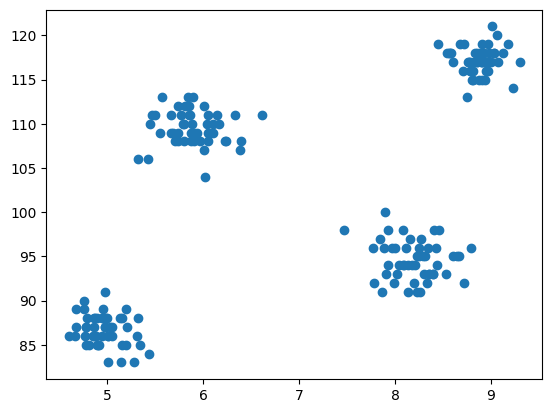

In [159]:
plt.scatter(df['cgpa'], df['iq'])

In [160]:
from sklearn.cluster import KMeans 

In [161]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [162]:
wcss

[29957.898287999997,
 4184.14127,
 2503.397581,
 681.96966,
 630.7818037959184,
 405.12058406910546,
 336.50554710765425,
 274.22946259996627,
 206.9381293615118,
 203.19164230669304]

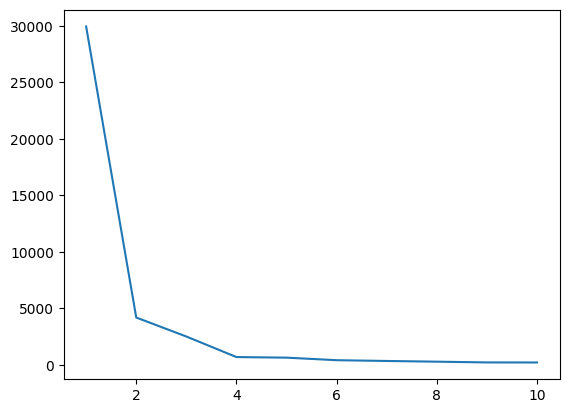

In [163]:
plt.plot(range(1,11), wcss)

In [164]:
x = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(x)

In [165]:
# x[y_means==0]
# x[y_means==1]
# x[y_means==2]
# x[y_means==3]

Text(0, 0.5, 'IQ')

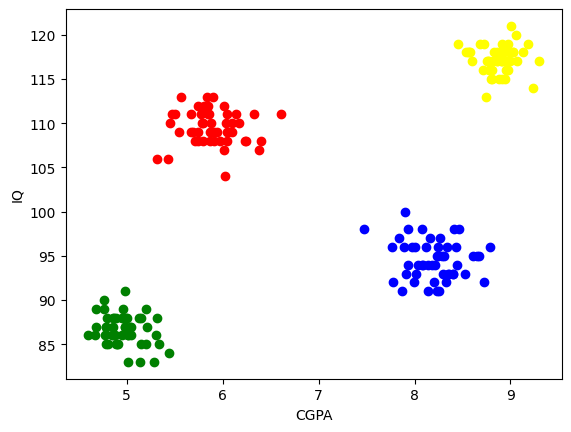

In [166]:
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], color='blue')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], color='red')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], color='green')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], color='yellow')

plt.xlabel('CGPA')
plt.ylabel('IQ')

k-Means 3-D Data

In [167]:
from sklearn.datasets import make_blobs
centroids = [(-5, -5, 5), (5, 5, -5), (3.5, -2.5, 4), (-2.5, 2.5, -4)]
cluster_std = [1,1,1,1]
x, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centroids, n_features=3, random_state=1)

# x

In [168]:
import plotly.express as px 
fig = px.scatter_3d(x=x[:,0], y=x[:,1], z=x[:,2])
fig.show()

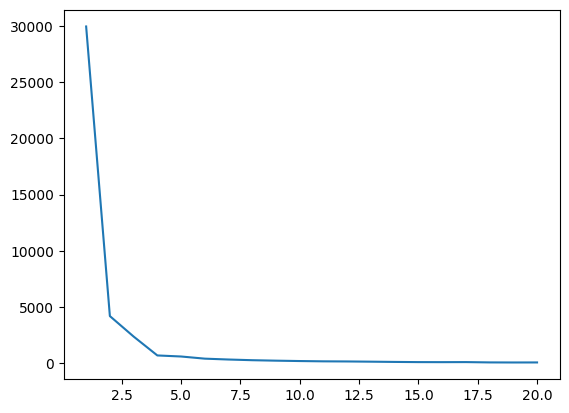

In [169]:
wcss = []
for i in range(1, 21):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

plt.plot(range(1,21), wcss)

In [170]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(x)

In [171]:
df = pd.DataFrame()

df['col1'] = x[:,0]
df['col2'] = x[:,1]
df['col3'] = x[:,2]
df['label'] = y_pred

In [173]:
fig = px.scatter_3d(df, x='col1', y='col2', z='col3', color='label')
fig.show()